![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

**Read `Salaries.csv` as a dataframe called `sal`.**

In [3]:
url="https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
s=requests.get(url).content
# can thu vien requests
sal = pd.read_csv(io.StringIO(s.decode('utf-8')))
# can thu vien io


**Check the head of the DataFrame.**

In [4]:
sal.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [5]:
sal.info()
print(sal.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
(148654, 13)


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

sal.mean(axis=0)

In [6]:
sal.loc[:,"BasePay"].mean()
#lay dong dau tien den dong cuoi theo cot BasePay, de tinh mean

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [7]:
sal.loc[:,"BasePay"].min()

-166.01

In [8]:
sal.loc[:,"BasePay"].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [9]:
a=sal.loc[:,"OvertimePay"].mean()
b=sal.loc[:,"OvertimePay"].min()
c=sal.loc[:,"OvertimePay"].max()
print('Mean:',a,'\nMin:',b,'\nMax:',c)
# lay ra cac gia tri can tim roi gan cho 3 bien va in ra

Mean: 5066.059886444622 
Min: -0.01 
Max: 245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [10]:
name1 = sal[sal.EmployeeName == 'JOSEPH DRISCOLL']
print (name1['JobTitle'].values)
# Lấy tất cả các bản ghi chứa thông tin của người có EmployeeName là JOSEPH DRISCOLL
#in ra gia tri JobTitle

['CAPTAIN, FIRE SUPPRESSION']


In [11]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
name2 = sal[sal.EmployeeName == 'GARY JIMENEZ']
print (name2['JobTitle'].values)
# Lấy tất cả các bản ghi chứa thông tin của người có EmployeeName là GARY JIMENEZ
#in ra gia tri JobTitle

['CAPTAIN III (POLICE DEPARTMENT)']


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [12]:
print (name1['TotalPayBenefits'].values)

[270324.91]


**What is the name of highest paid person (including benefits)?**

In [14]:
Max=sal.loc[:,"TotalPayBenefits"].max()
# tim gia tri highest paid
NameMax = sal[sal.TotalPayBenefits == Max]
#Lấy tất cả các bản ghi chứa thông tin của người có TotalPayBenefits == Max
print (NameMax['EmployeeName'].values)

#in ra gia tri EmployeeName cua nguoi do


['NATHANIEL FORD']


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [77]:
Min=sal.loc[:,"TotalPayBenefits"].min()
# tim ra lowest paid values
NameMin = sal[sal.TotalPayBenefits == Min]
#Lấy tất cả các bản ghi chứa thông tin của người có TotalPayBenefits == Min
print (NameMin[['EmployeeName','TotalPayBenefits']].values)

#in ra gia tri EmployeeName cua nguoi do


[['Joe Lopez' -618.13]]


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [20]:
YearGr=sal.groupby('Year'); #group by to classify by year
Basemean=YearGr['BasePay'].mean();# Calculate mean for each year
Basemean # print result
        

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [30]:
#JobGr=sal.groupby('JobTitle')
#len(JobGr.groups)
#arr = sal['JobTitle'].unique() 
#len(arr)
unique_value = sal['JobTitle'].nunique(dropna = True) #dem cac gia tri khac nhau trong Jobtitle.
#Dropna=True: loai bo cac gia tri null
unique_value # in ra ket qua tra ve

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [99]:
Job=sal['JobTitle'].value_counts() # dem cac JobTitle
DJob=Job.reset_index(name='count') # cot moi dem xong chuyen thanh mot cot trong dataframe ten la count
DJob.sort_values(by=['count']) #Sap xep cac phan tu trong dataframe dua theo count
Top5Job=DJob.head(5) # lay ra top 5
Top5Job

,index,count
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [66]:
year13 = sal[sal['Year'] == 2013] # chi lay nhung dong co year==2013
Job=year13['JobTitle'].value_counts() # dem so lan xuat hien cua 1 jobtitle trong nam
DJob13=Job.reset_index(name='count13') # dua cot dem do thanh 1 cot trong dataframe
Job1 =DJob13[DJob13['count13'] == 1] # chi lay nhung dong co count ==1
len(Job1)# dem so phan tu co count==1

202

**How many people have the word Chief in their job title?**

In [17]:
year13 = sal[sal['Year'] == 2013] # chi lay nhung dong co job title like 'Chief'
Job=year13['JobTitle'].value_counts() # dem so lan xuat hien cua 1 jobtitle trong nam
DJob13=Job.reset_index(name='count13') # dua cot dem do thanh 1 cot trong dataframe
Job1 =DJob13[DJob13['count13'] == 1] # chi lay nhung dong co count ==1
len(Job1)# dem so phan tu co count==1

In [74]:
Chief = sal[sal['JobTitle'].str.contains("Chief")] # tu JobTitle, find out phan tu co chua chuoi Chief
len(Chief) #dem so phan tu trong Chief

423

## Data Visualization

**Implement seaborn's countplot with x='Year'**

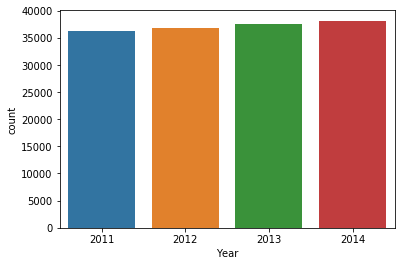

In [77]:
sns.countplot(x='Year',data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

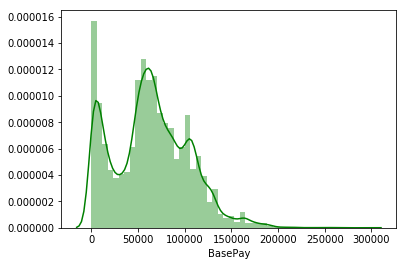

In [96]:
year11 = sal[sal['Year'] == 2011] #lay ra ban ghi nam 2011
BasePay=year11['BasePay'].dropna()# lay cot BasePay tu year2011
sns.distplot(BasePay,color="g") #Bieu dien thanh bieu do
plt.show()

**How about other Year**

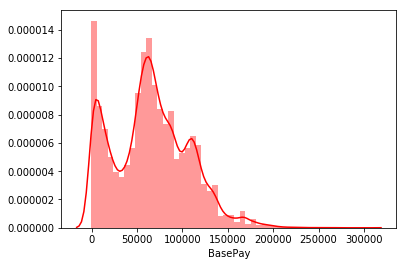

In [94]:
year12 = sal[sal['Year'] == 2012]
BasePay=year12['BasePay'].dropna()
sns.distplot(BasePay,color="r")
plt.show()

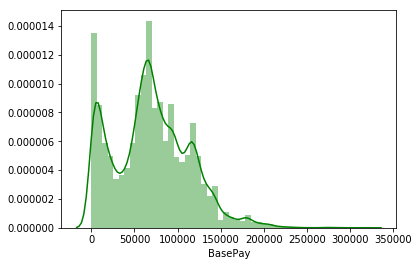

In [95]:
year13 = sal[sal['Year'] == 2013]
BasePay=year13['BasePay'].dropna()
sns.distplot(BasePay,color="g") 
plt.show()

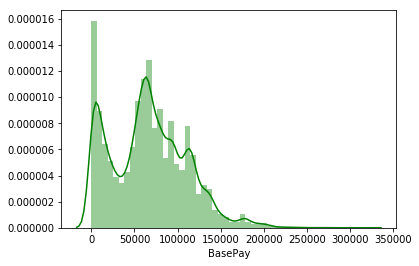

In [6]:
year14 = sal[sal['Year'] == 2014]
BasePay=year14['BasePay'].dropna()
sns.distplot(BasePay,color="g") 
plt.show()

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

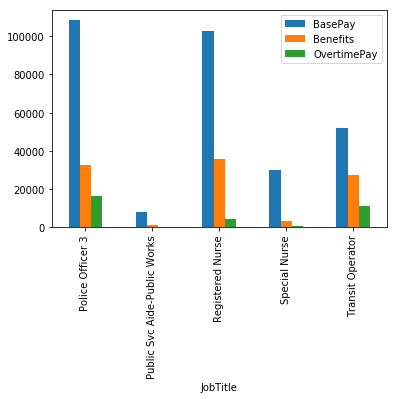

In [27]:

groupJobTitle = sal.groupby('JobTitle').mean() # groupby theo JobTitle, roi tinh mean
indexJob = sal['JobTitle'].value_counts().head(5).index # tim index
result = groupJobTitle[groupJobTitle.index.isin(indexJob)][['BasePay','Benefits','OvertimePay']] 
#lay tat ca du lieu cua 3 cot: ['BasePay','Benefits','OvertimePay'] nhom theo JobTitle
result.plot(kind = 'bar') # tra ket qua ve theo bieu do 

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [33]:
sal['title_len'] = sal['JobTitle'].apply(len)
sal[['TotalPayBenefits', 'title_len']].corr()

,TotalPayBenefits,title_len
TotalPayBenefits,1.000000,-0.036878
title_len,-0.036878,1.000000


# Great Job!